<a href="https://colab.research.google.com/github/aalr007/iayaa-Equipo-19/blob/main/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

* Aurelio Antonio Lozano Rabago A01081266
* Josias R A00968460  
* David González A01794025
* Jerson David Pérez Contreras A01793810
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [58]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report, make_scorer

#importando para ejercicio 3
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#librerias para ejercicio4 modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

import matplotlib.pyplot as plt



#**Ejercicio-1.** 

In [15]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("SouthGermanCredit.asc", sep=" ")
misdatos.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [16]:
#renombramos las columnas
misdatos.rename(columns={
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk',
},inplace=True)
misdatos.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [34]:
X = misdatos.loc[:,["status","duration","credit_history","purpose","amount","savings","employment_duration","installment_rate",	"personal_status_sex",	"other_debtors","present_residence",	"property",	"age",	"other_installment_plans",	"housing",	"number_credits"	,"job",	"people_liable"	,"telephone",	"foreign_worker"]]
y = misdatos.loc[:,'credit_risk']

#Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=10)



#**Ejercicio-3.**

In [45]:
df_CategoricalVar = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
df_CuantitativaDiscVar= ["employment_duration","installment_rate","present_residence","property","number_credits","job"]
df_NumericVar= ["duration","amount","age"]
df_BinaryVar= ["people_liable","telephone","foreign_worker"]

In [41]:
X_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [46]:
X_train.isna().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool

In [47]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [50]:
#trabajamos las imputaciones
#pipeline variables Numericas
df_PipelineNum= Pipeline(steps = [('ImpMediana', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
columnas_PipelineNum =df_NumericVar

#pipeline variables categoricas
df_PipelineCate = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineCate = df_CategoricalVar


#pipeline variables binarias
df_PipelineBin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_df_PipelineBin = df_BinaryVar


#realizamos la transformacion con los pipelines anteriores a las columnas adecuadas
df_ColTransformadas = ColumnTransformer(transformers=[('Numericas', df_PipelineNum, columnas_PipelineNum), 
                                            ('Categoricas', df_PipelineCate , columnas_df_PipelineCate), 
                                            ('binarias', df_PipelineBin, columnas_df_PipelineBin)], 
                                            remainder='passthrough')

X_train_fit = df_ColTransformadas.fit(X_train)

#**Ejercicio-4.**

In [51]:
#reusamos las metricas recall, f1, gmean.
def mi_recall(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  recall = Vp/(Vp+Fn)
  return recall

def mi_f1score(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*Vp)/((2*Vp)+Fp+Fn)
  return f1score

def mi_gmean(yreal, ypred):
  Vn, Fp, Fn, Vp= confusion_matrix(yreal,ypred).ravel()
  recall = mi_recall(yreal, ypred)
  especificidad= Vn / (Vn+Fp)
  gmean = np.sqrt(recall*especificidad)
  #En caso de querer comprobar que el gmean tenga buen resultado, usamos la funcion de sklearn
  #PEgar funcion aqui
  return gmean

def mi_accuracy(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (Vp+Vn)/(Vp+Vn+Fp+Fn)
  return accuracy

def mi_precision(yreal, ypred):
  Vn, Fp, Fn, Vp = confusion_matrix(yreal, ypred).ravel()
  precision = Vp/(Vp+Fp)
  return precision



#creamos la lista de modelos con sus nombres
def Do_models():
  #listas
  modelos = list()
  nombres = list()

  # Modelo de Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('RegresionLog')

  # Modelo de arbol de Decision:
  modelos.append(DecisionTreeClassifier())
  nombres.append('ArbolDecision')
  
  #modelo bosque aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('BosqueAleatorio')
  
  return modelos, nombres


resultados = list()


In [52]:
#creamos los modelos
modelos, nombres = Do_models()  
modelos


[LogisticRegression(solver='liblinear'),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [53]:
for i in range(len(modelos)):

#Kfold validacion cruzada de 5 particiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#en pipeline ponemos las columnas transformadas y los modelos
  pipeline = Pipeline(steps=[('ct',df_ColTransformadas),('m',modelos[i])])

  mis_metricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision":make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mis_metricas, cv=kfold, return_train_score=True)
  
  resultados.append(resultadosOU)
  
  print("Prueba \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']), np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),np.std(resultadosOU['test_gmean'])
                                                                          ))
  

  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_accuracy']), np.std(resultadosOU['train_accuracy']),  
                                                                          np.mean(resultadosOU['train_precision']), np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']), np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']), np.std(resultadosOU['train_f1score']), 
                                                                          np.mean(resultadosOU['train_gmean']), np.std(resultadosOU['train_gmean']) ))



Prueba 

RegresionLog:
mean Accuracy: 0.753 (0.0282)
mean Precision: 0.797 (0.0204)
mean Recall: 0.875 (0.0263)
mean F1score: 0.834 (0.0193)
Gmean: 0.632 (0.0462)

Entrenamiento 

RegresionLog:
mean Accuracy: 0.792 (0.0076)
mean Precision: 0.818 (0.0075)
mean Recall: 0.908 (0.0061)
mean F1score: 0.861 (0.0047)
Gmean: 0.681 (0.0166)

Prueba 

ArbolDecision:
mean Accuracy: 0.666 (0.0286)
mean Precision: 0.770 (0.0285)
mean Recall: 0.756 (0.0540)
mean F1score: 0.762 (0.0248)
Gmean: 0.575 (0.0600)

Entrenamiento 

ArbolDecision:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

BosqueAleatorio:
mean Accuracy: 0.761 (0.0214)
mean Precision: 0.786 (0.0150)
mean Recall: 0.911 (0.0301)
mean F1score: 0.843 (0.0152)
Gmean: 0.599 (0.0413)

Entrenamiento 

BosqueAleatorio:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4b60c3a050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4b60c3aad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4b60cb7a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4b60c405d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b60c48090>,
 'means': [<matplotlib.lines.Line2D at 0x7f4b60c40b10>,
  <matplotlib.lines.Line2D at 0x7f4b60c75110>]}

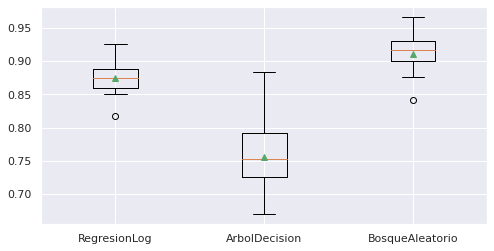

In [60]:
sns.set(rc={'figure.figsize':(8,4)})

#########################################################################
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 6
# Incluir el diagrama de caja de cada modelo de los resultados obtenidos 
# con la métrica Recall.
# Sustituye None por las líneas de código.
# Se esperan unas 5 líneas de código aproximadamente.

bpRecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)


#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**